# Data Visualization - Global Seismographic Network

## Using [PyGMT](https://www.pygmt.org/latest/)

![IRIS Logo](https://www.iris.edu/hq/images/layout/logos/iris_logo_shadow.png)

#### Description

The Global Seismographic Network (GSN) is a globally distributed, state-of-the-art digital seismic network that provides free, realtime, open access data through the IRIS DMC.  The map below shows the distribution of the current station network with respect to network operations. For more information check out the program at [IRIS](https://www.iris.edu/hq/programs/gsn "GSN program"). Station data is downloaded from [USGS](https://earthquake.usgs.gov/monitoring/operations/network.php?virtual_network=GSN "GSN stations").

In [44]:
# Import packages
import pandas as pd
import pygmt
%matplotlib inline

#### How to read data from a webpage?

Follow the instructions on [towards data science](https://towardsdatascience.com/all-pandas-read-html-you-should-know-for-scraping-data-from-html-tables-a3cbb5ce8274).

In [45]:
# Read data from webpage
url = "https://earthquake.usgs.gov/monitoring/operations/network.php?virtual_network=GSN"
dfs = pd.read_html(url)

print(f'Total tables: {len(dfs)}')

Total tables: 1


In [46]:
gsn = dfs[0]
gsn.head()
#print("Shape of dataframe: {}".format(gsn.shape))

,Network Code,Station Code,Name,Telemetry,Latitude,Longitude,Elevation
0,CU,ANWB,North Barbuda Island,–,17.669,-61.786,39.0
1,CU,BBGH,"Gun Hill, Barbados",–,13.143,-59.559,180.0
2,CU,BCIP,"Isla Barro Colorado, Panama",–,9.166,-79.837,61.0
3,CU,GRGR,"Grenville, Grenada",–,12.132,-61.654,195.0
4,CU,GRTK,"Grand Turk, Turks and Caicos Islands",–,21.511,-71.133,12.0


In [47]:
# Save dataframe
gsn.to_csv("output/GSNstations.csv")

In [48]:
# Load GMT Earth relief data in a xarray.DataArray
topo = pygmt.datasets.load_earth_relief("10m")

In [49]:
# Initialize figure
fig = pygmt.Figure()
#fig.basemap(frame=["a", '+t"Trinidad and Tobago"'])
fig.basemap(region="d", projection="N20c", frame=["a", "+tGlobal\bSeismographic\bStations"])
fig.grdimage(topo, cmap="geo")
fig.colorbar(position="JCR+v",
    frame=["x2000", "y+lm"])

grdimage [WARNING]: Mixing old CPT master tables with HINGE = <value> in D:/GMT5/share/cpt/geo.cpt.  Interpreted as HARD_HINGE.


In [50]:
# Add stations
fig.plot(x=gsn.Longitude, y=gsn.Latitude, style="i0.5c", color="red", pen="black")

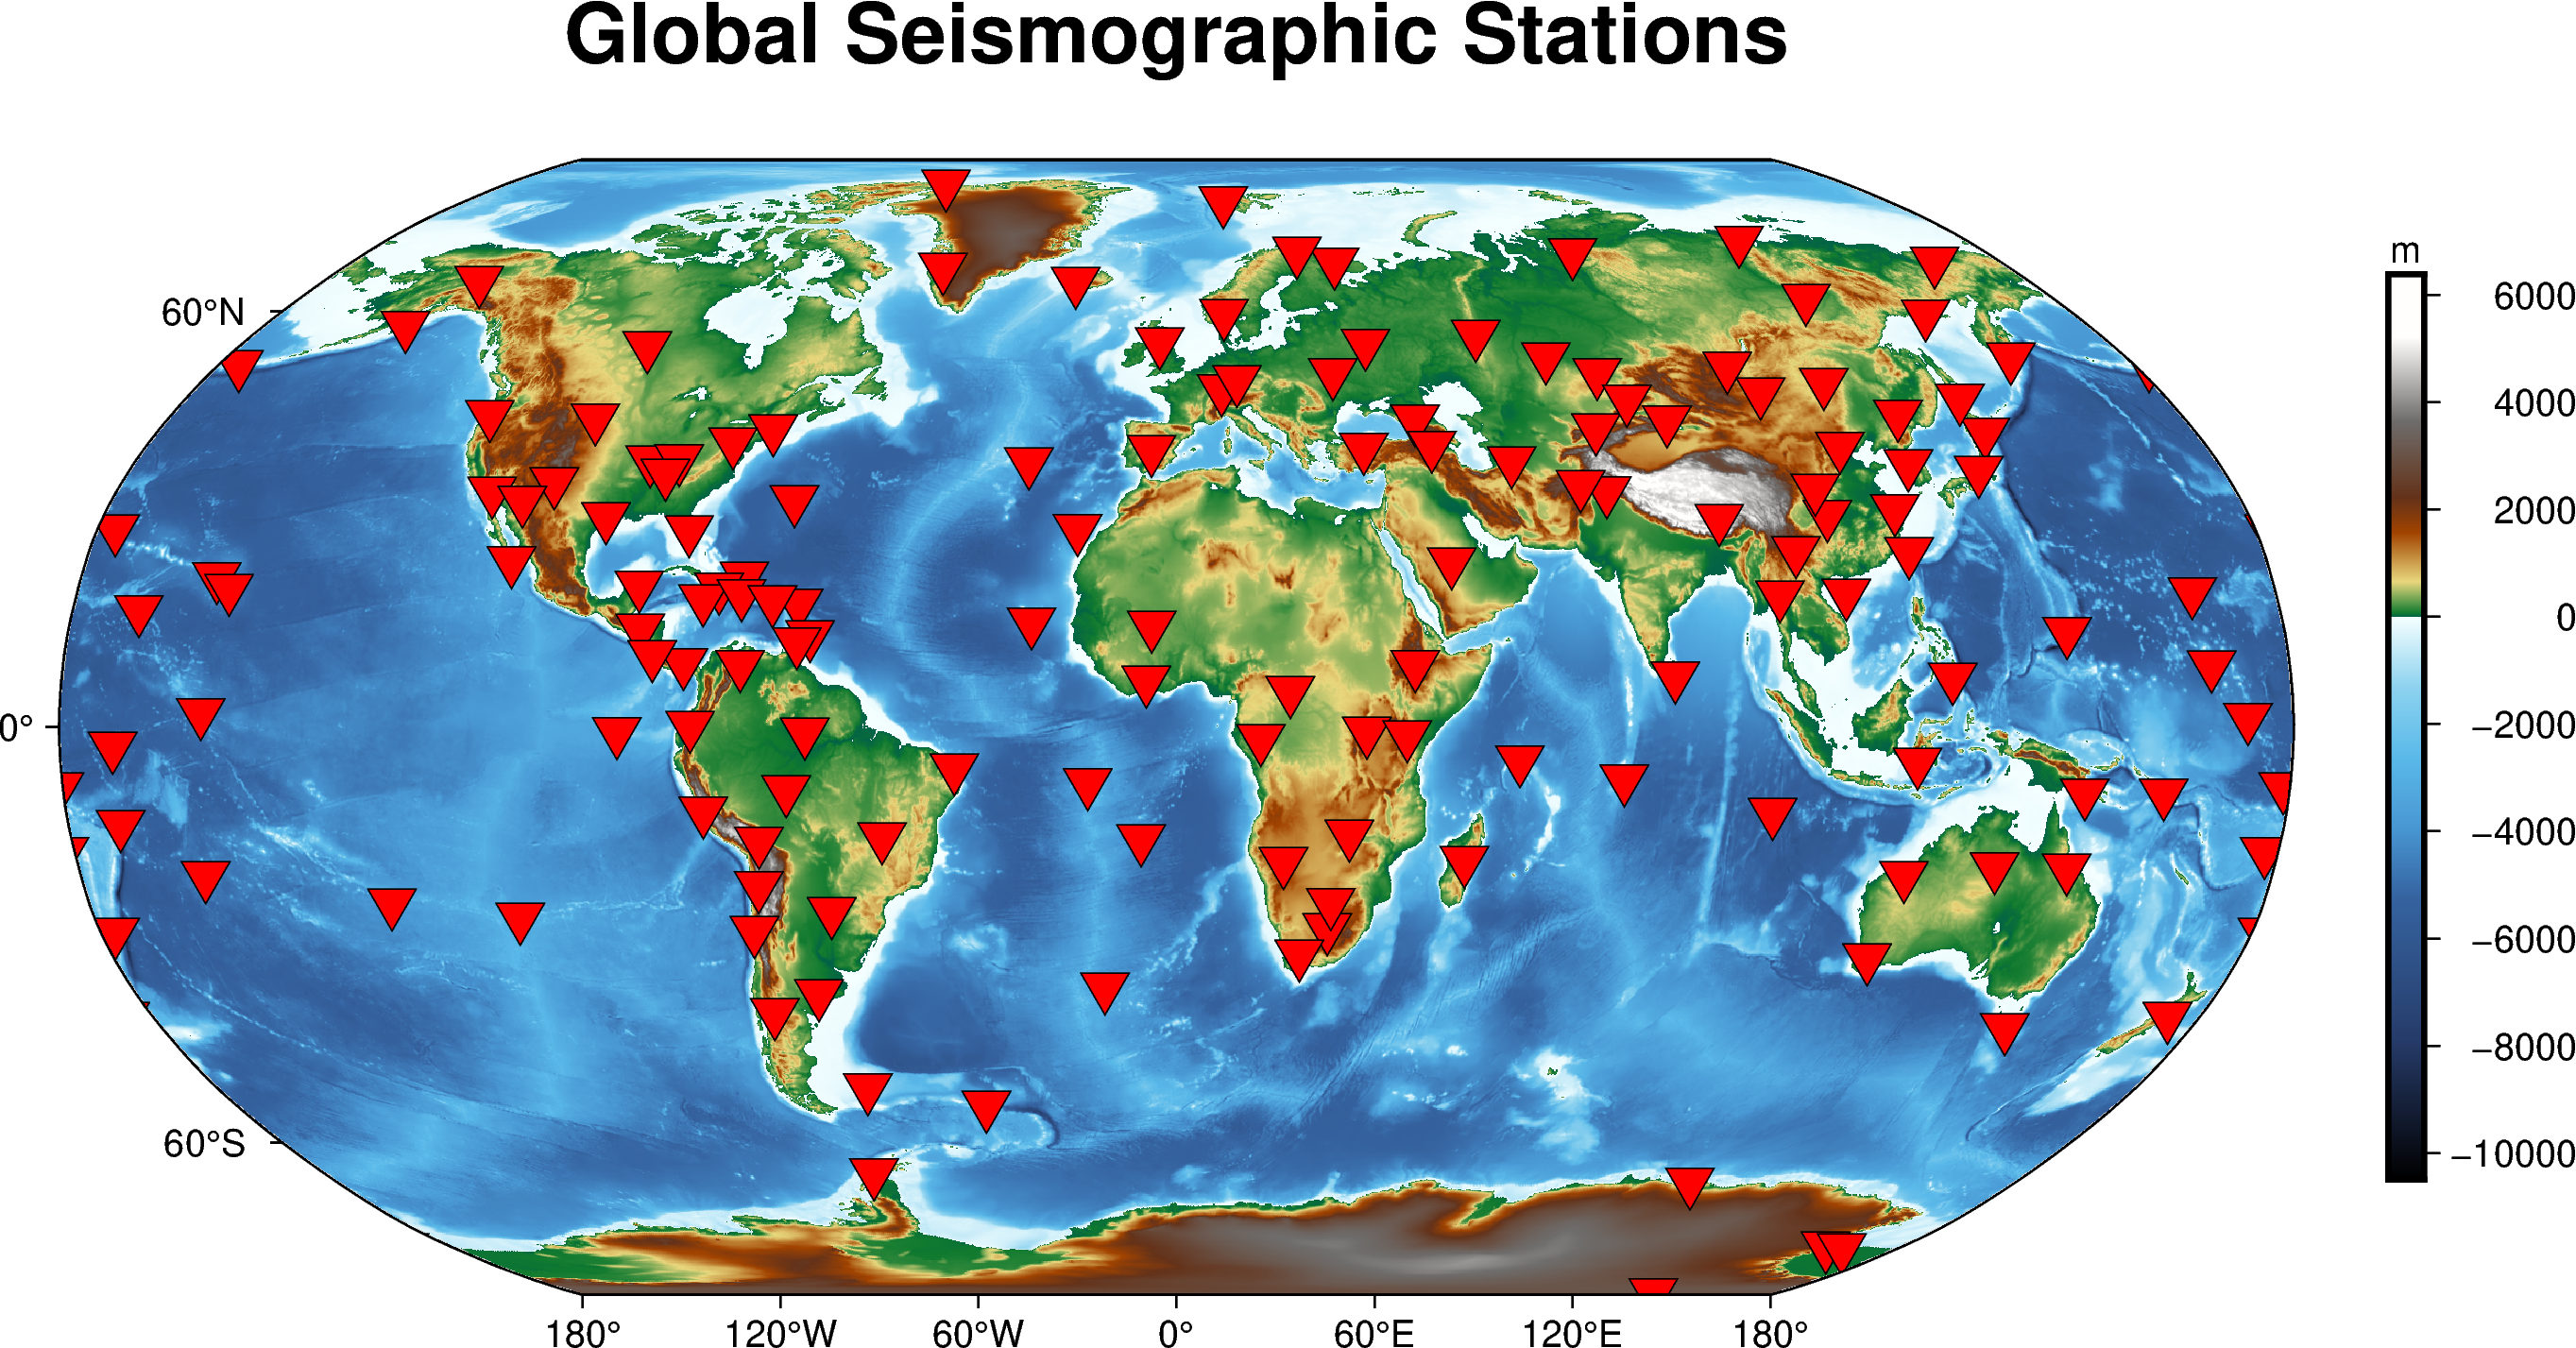

In [51]:
# Show map
fig.show()

In [52]:
# Save map
fig.savefig("output/GNSstations_PyGMT.png", dpi=300)